Run Classifiers on Pokemon Data Set

In [158]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

IMAGE_DIRECTORY='./data/';
NUM_IMAGES = 714
IMAGE_SIZE = 32
IMAGE_ARR_SIZE = 32 * 32 * 4

def load_images(image_dir):
    labels = []
    names = []
    image_index = 0
    
    
    # 714 because the Flying Pokemon were removed
    X = np.ndarray(shape=(714, IMAGE_ARR_SIZE))
                        
    
    # Loop through all the types directories
    for type in os.listdir(image_dir):
        type_images = os.listdir(image_dir + type + '/')
        
        # Loop through all the images of a type directory
        for image in type_images:
            image_file = os.path.join(image_dir, type, image)
            names.append(image)

            # reading the images as they are; no normalization, no color editing
            image_data = mpimg.imread(image_file)         
            X[image_index, :] = image_data.flatten()
            image_index += 1
            labels.append(type)
        
    return (X, np.asarray(labels), np.asarray(names))


def plot_pokemon(data):
    plt.figure(figsize=(1,1))
    image = data.reshape(32, 32, 4)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

def plot_pokemons(instances, images_per_row=10, **options):
    size = IMAGE_SIZE
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size,4) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        if (row == len(instances)/images_per_row):
            break
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        #print (row, np.array(rimages).shape)    
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")
    plt.show()

In [125]:
X, labels, names = load_images(IMAGE_DIRECTORY)

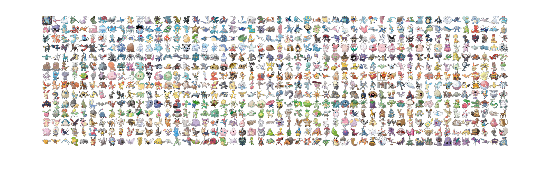

In [126]:
plot_pokemons(X, images_per_row=50)

In [127]:
def get_pokemon_of_type(X, labels, type):
    poke_type = []
    for row in range(len(X)-1):
        if (labels[row]==type):
            poke_type.append(X[row])
    return np.asarray(poke_type)

pk = get_pokemon_of_type(X, labels, 'Fire')
pk.shape

(46, 4096)

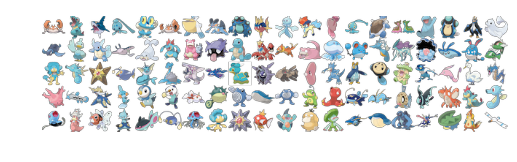

(105, 4096)

In [128]:
pk = get_pokemon_of_type(X, labels, 'Water')
plot_pokemons(pk, images_per_row=20)
pk.shape

Fire: Training Smaple


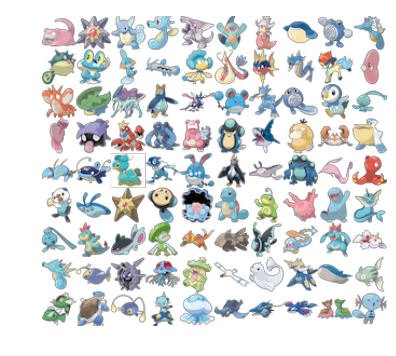

(95, 4096)
Fire: Test Sample


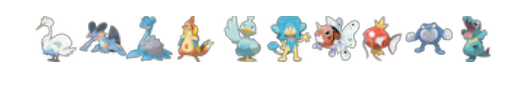

(10, 4096)


In [148]:
shuffle_index = np.random.permutation(NUM_IMAGES)
X, labels = X[shuffle_index], labels[shuffle_index]
X_train, X_test, labels_train, labels_test = X[:600], X[600:], labels[:600], labels[600:]

labels_train_type = (labels_train == 'Water')
labels_test_type = (labels_test == 'Water')

print ('Fire: Training Smaple')
p = get_pokemon_of_type(X_train, labels_train, 'Water')
plot_pokemons(p, images_per_row=10)
print (p.shape)

print ('Fire: Test Sample')
p1 = get_pokemon_of_type(X_test, labels_test, 'Water')
plot_pokemons(p1, images_per_row=10)
print (p1.shape)

In [149]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, labels_train_type)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [150]:
cross_val_score(sgd_clf, X_train, labels_train_type, cv=3, scoring="accuracy")

array([ 0.82089552,  0.83      ,  0.83919598])

In [151]:
labels_train_pred = cross_val_predict(sgd_clf, X_train, labels_train_type, cv=5)
confusion_matrix(labels_train_type, labels_train_pred)

array([[491,  14],
       [ 85,  10]])

In [152]:
precision_score(labels_train_type, labels_train_pred)

0.41666666666666669

In [153]:
recall_score(labels_train_type, labels_train_pred)

0.10526315789473684

In [154]:
f1_score(labels_train_type, labels_train_pred)

0.16806722689075632

In [138]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, labels_train_Fire)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [155]:
cross_val_score(forest_clf, X_train, labels_train_type, cv=3, scoring="accuracy")

array([ 0.82089552,  0.84      ,  0.83417085])

In [159]:
labels_train_pred = cross_val_predict(forest_clf, X_train, labels_train_type, cv=5)
confusion_matrix(labels_train_type, labels_train_pred)

array([[496,   9],
       [ 90,   5]])

In [161]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state=42)
logreg.fit(X_train, labels_train_type)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
labels_train_pred = cross_val_predict(logreg, X_train, labels_train_Fire, cv=5)
confusion_matrix(labels_train_type, labels_train_pred)

array([[474,  31],
       [ 89,   6]])